In [1]:
import tweepy
from econfig import *
import datetime as dt

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

try:
    api.verify_credentials()
    print("Authentication Complete")
except:
    print("Authentication Unable to Complete")
    
two_days = (dt.datetime.now() - dt.timedelta(days=2)).strftime("%Y-%m-%d")
one_day = (dt.datetime.now() - dt.timedelta(days=1)).strftime("%Y-%m-%d")

# startDate = datetime.datetime(2014, 6, 1, 0, 0, 0)
# endDate =   datetime.datetime(2015, 1, 1, 0, 0, 0)
MAX_TWEETS = 500
tweets = tweepy.Cursor(api.search, q='#election2020', rpp=100, since=two_days, until=one_day).items(MAX_TWEETS)


Authentication Complete


In [3]:
id = []
username = []
followers_count = []
interaction_count = []
for tweet in tweets:
    interaction = tweet.retweet_count + tweet.favorite_count
    interaction_count.append(interaction)
    followers_count.append(tweet.user.followers_count)
    id.append(tweet.id)
    username.append(tweet.user.screen_name)
    pass


Rate limit reached. Sleeping for: 712


In [10]:
print(type(id[0]))

<class 'int'>


In [13]:
rows = zip(id,username,followers_count,interaction_count)

In [16]:
rows = zip(id,username,followers_count,interaction_count)
for row in rows:
    print(row)

(1230643261712322565, 'JohnVetsResist1', 6691, 0)
(1230643138756255744, 'Cant_Be_Passive', 55, 0)
(1230643029125607429, 'SheilaCreates', 1112, 0)
(1230642998670774275, 'AngeloJohnGage', 32155, 3)
(1230642936804773889, 'KVERNVOLLEN', 252, 0)


In [17]:
type(rows)

zip

In [18]:
type(row)


tuple

In [15]:
import psycopg2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Testing Linear Regression using followers to predict interactions (retweets and favorited tweets)
X = np.array(followers_count).reshape(-1,1)
y = np.array(interaction_count).reshape(-1,1)
print(X.shape,y.shape)

(500, 1) (500, 1)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [19]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(f"Training Data: {model.score(X_train,y_train)}")
print(f"Testing Data: {model.score(X_test,y_test)}")

Training Data: 0.009039304590699349
Testing Data: 0.008268559084011473


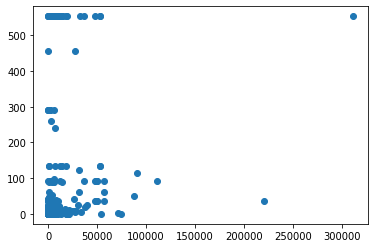

In [22]:
plt.scatter(X,y)